### **Installing and loading in Libraries required for the project**

In [3]:
!pip install geopandas
!pip install contextily
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.signal as signal
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.base.datetools import dates_from_str
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.tri as Tri
from shapely.geometry import Point
import plotly.express as px
from shapely import wkt
import geopandas as gpd
import contextily as cx
import plotly.graph_objects as go
import folium
import seaborn as sns
sns.set(style = 'white')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Loading in our Dataset**

In [4]:
df = pd.read_csv('data.csv')
coords_crs = "EPSG:4326"
df['GeoPoint'] = gpd.GeoSeries.from_wkt(df['GeoPoint'])
gdf = gpd.GeoDataFrame(df, geometry = 'GeoPoint', crs = coords_crs)

gdf

,Country,Year,Language,Country Code,Debt,Account Balance,Corruption,GeoPoint,Foreign_Investment,GDP,...,intensity_level,minor conflict,war,conflict,internationalized internal,internal,interstate,extrasymetric,emergence,War emergence
0,Uganda,1960,0.9227,UGA,NaN,NaN,26.0,POINT (32.21666 1.53336),NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,Uganda,1961,0.9227,UGA,NaN,NaN,26.0,POINT (32.21666 1.53336),NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,Uganda,1962,0.9227,UGA,NaN,NaN,26.0,POINT (32.21666 1.53336),NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,Uganda,1963,0.9227,UGA,NaN,NaN,26.0,POINT (32.21666 1.53336),NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Uganda,1964,0.9227,UGA,NaN,NaN,26.0,POINT (32.21666 1.53336),NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13324,"Yemen, Rep.",2015,0.0080,YEM,66.670000,-7.098624,14.0,POINT (47.89153 16.34712),-0.036231,-18.799099,...,0,1,0,1,0,1,0,0,1,0
13325,"Yemen, Rep.",2015,0.0080,YEM,66.670000,-7.098624,14.0,POINT (47.89153 16.34712),-0.036231,-18.799099,...,1,0,1,1,1,0,0,0,0,0
13326,"Yemen, Rep.",2016,0.0080,YEM,22.854350,-7.811101,14.0,POINT (47.89153 16.34712),-1.811533,-15.752675,...,1,0,1,1,1,0,0,0,0,0
13327,"Yemen, Rep.",2017,0.0080,YEM,26.855552,-7.811101,14.0,POINT (47.89153 16.34712),-1.006201,-8.194890,...,1,0,1,1,1,0,0,0,0,0


In [5]:
list(gdf)

['Country',
 'Year',
 'Language',
 'Country Code',
 'Debt',
 'Account Balance',
 'Corruption',
 'GeoPoint',
 'Foreign_Investment',
 'GDP',
 'Inflation',
 'Ethnicity',
 'Religion',
 'unemployment',
 'Natural Ressources',
 'Infant Mortality',
 'incompatibility',
 'intensity_level',
 'minor conflict',
 'war',
 'conflict',
 'internationalized internal',
 'internal',
 'interstate',
 'extrasymetric',
 'emergence',
 'War emergence']

Plotting Average number of wars grouped by year

In [6]:
wars = gdf.groupby("Year")["war"].mean()

fig = px.line(wars, markers = True)
fig.update_layout(title = 'Average Number of Wars by Year', yaxis_title = 'Avg No. of Wars')
fig.show()

Plotting an Area graph to visualize the density of each type of Conflict

In [7]:
internationalized_type = gdf.groupby("Year")["internationalized internal"].mean()
internal_type = gdf.groupby("Year")["internal"].mean()
interstate_type = gdf.groupby("Year")["interstate"].mean()
extrasymetric_type = gdf.groupby("Year")["extrasymetric"].mean()


typesDf = pd.DataFrame()
typesDf['Internal'] = internal_type
typesDf['Internationalized internal'] = internationalized_type
typesDf['Interstate'] = interstate_type
typesDf['Extrasymetric'] = extrasymetric_type
typesDf


fig = px.area(typesDf, markers = True)
fig.update_layout(title='Confict Types by Year', yaxis_title = 'Mean of each conflict type')
fig.show()

**Plotting a periodogram to see if there is any periodocity for occurence of wars and conflicts**

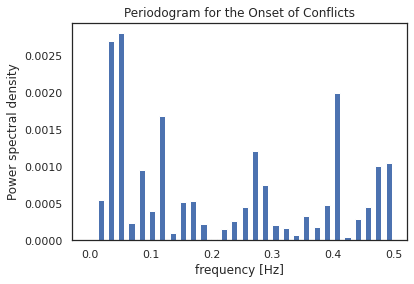

[(0.05084745762711865, 19.666666666666664), (0.03389830508474576, 29.5), (0.4067796610169492, 2.458333333333333), (0.11864406779661017, 8.428571428571429)]


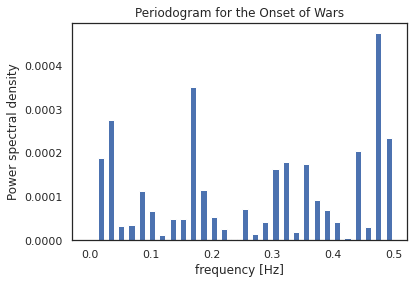

[(0.4745762711864407, 2.107142857142857), (0.1694915254237288, 5.9), (0.03389830508474576, 29.5), (0.4915254237288136, 2.0344827586206895)]


In [8]:
conflicts = gdf.groupby(['Year'])["emergence"].mean()
f, Pxx_spec = signal.periodogram(conflicts, 1.0)
plt.bar(f[0:], Pxx_spec[0:], width=0.01)
plt.xlabel('frequency [Hz]')
plt.ylabel('Power spectral density')
plt.title('Periodogram for the Onset of Conflicts')
plt.show()

maxs = Pxx_spec.argsort()[-4:][::-1]
print([( f[i], 1/f[i]) for i in maxs] )

conflicts = gdf.groupby(['Year'])["War emergence"].mean()
f, Pxx_spec = signal.periodogram(conflicts, 1.0)
plt.bar(f[0:], Pxx_spec[0:], width=0.01)
plt.xlabel('frequency [Hz]')
plt.ylabel('Power spectral density')
plt.title('Periodogram for the Onset of Wars')
plt.show()

maxs = Pxx_spec.argsort()[-4:][::-1]
print([( f[i], 1/f[i]) for i in maxs] )

Plotting average of wars per year

In [9]:
wars = gdf.groupby("Year")["war"].mean()
fig = px.line(wars, markers = True)
fig.update_layout(title='Mean of Wars by Year')
fig.show()

Plotting Autocorreltion and Partial Autocorrelation

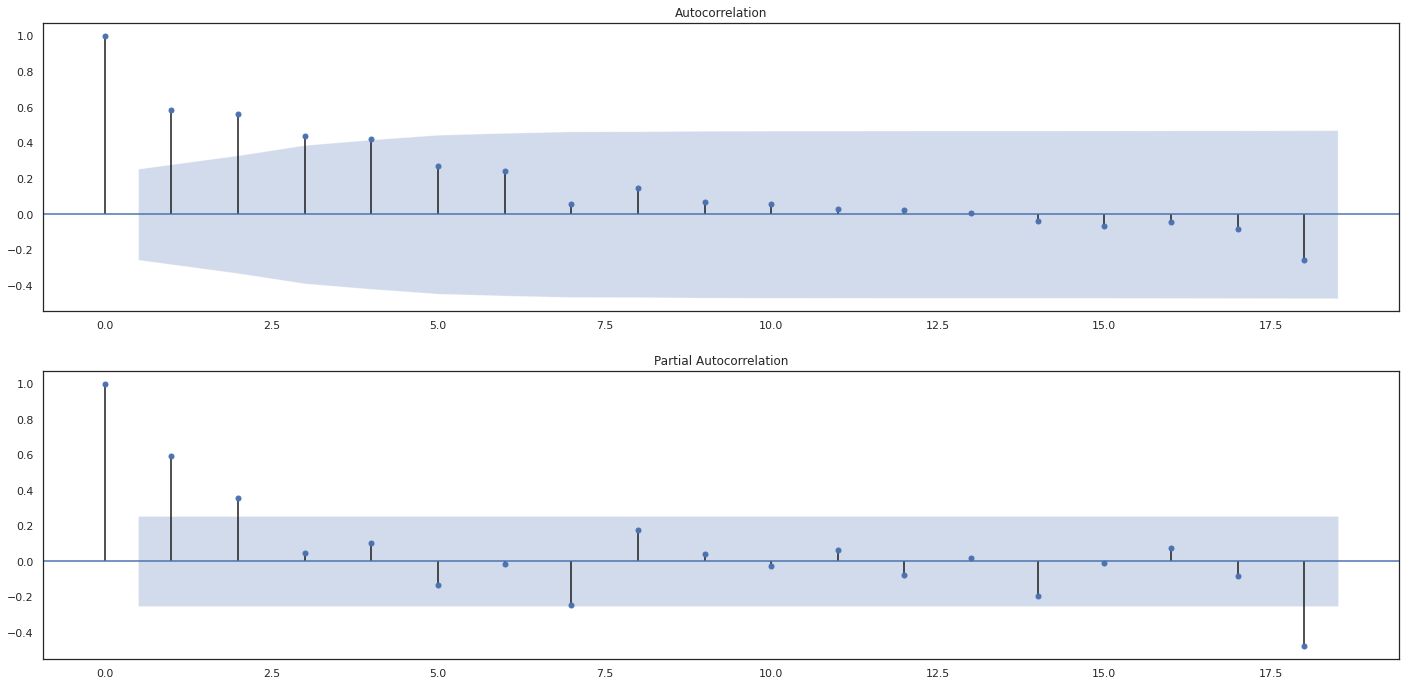

In [10]:
fig, ax = plt.subplots(2, figsize = (20,10))
ax[0] = plot_acf(wars, ax = ax[0])
ax[1] = plot_pacf(wars, ax = ax[1])
fig.tight_layout(pad=2.0)
plt.savefig("Auto_correlation_wars.png")
plt.show()

Plotting number of Wars and Conflict emerging every year

In [11]:
new_conflict = gdf.groupby("Year")["emergence"].sum()
new_war = gdf.groupby("Year")["War emergence"].sum()

newConflictDf = pd.DataFrame()
newConflictDf['Sum of conflict'] = new_conflict
newConflictDf['Sum of war'] = new_war


fig = px.line(newConflictDf, markers = True)
fig.update_layout(title='New Conflicts and Wars by Year')
fig.show()
plt.savefig("Conflict_War_yearly.png")


<Figure size 432x288 with 0 Axes>

Plotting whether Ethnicity, Religion or Language is directly correlated to more internal conflicts in a country

In [12]:
civilEthnicity1 = gdf[(gdf["Ethnicity"] > 0) & (df["Ethnicity"] <= 0.3) ].groupby("Year")["internal"].mean()
civilEthnicity2 = gdf[(gdf["Ethnicity"] > 0.3) & (df["Ethnicity"] <= 0.6) ].groupby("Year")["internal"].mean()
civilEthnicity3 = gdf[(gdf["Ethnicity"] > 0.6) & (df["Ethnicity"] <= 0.9) ].groupby("Year")["internal"].mean()

civilReligion1 = gdf[(gdf["Religion"] > 0) & (df["Religion"] <= 0.3) ].groupby("Year")["internal"].mean()
civilReligion2 = gdf[(gdf["Religion"] > 0.3) & (df["Religion"] <= 0.6) ].groupby("Year")["internal"].mean()
civilReligion3 = gdf[(gdf["Religion"] > 0.6) & (df["Religion"] <= 0.9) ].groupby("Year")["internal"].mean()

civilLanguage1 = gdf[(gdf["Language"] > 0) & (df["Language"] <= 0.3) ].groupby("Year")["internal"].mean()
civilLanguage2 = gdf[(gdf["Language"] > 0.3) & (df["Language"] <= 0.6) ].groupby("Year")["internal"].mean()
civilLanguage3 = gdf[(gdf["Language"] > 0.6) & (df["Language"] <= 0.9) ].groupby("Year")["internal"].mean()


civilWarEthnicity = pd.DataFrame()
civilWarEthnicity['0 - 0.3'] = civilEthnicity1
civilWarEthnicity['0.3 - 0.6'] = civilEthnicity2
civilWarEthnicity['0.6 - 0.9'] = civilEthnicity3

civilWarReligion = pd.DataFrame()
civilWarReligion['0 - 0.3'] = civilReligion1
civilWarReligion['0.3 - 0.6'] = civilReligion2
civilWarReligion['0.6 - 0.9'] = civilReligion3

civilWarLanguage = pd.DataFrame()
civilWarLanguage['0 - 0.3'] = civilLanguage1
civilWarLanguage['0.3 - 0.6'] = civilLanguage2
civilWarLanguage['0.6 - 0.9'] = civilLanguage3


fig = px.line(civilWarEthnicity, markers = False)
fig.update_layout(title='Internal Conflicts by Ethnicity', yaxis_title = 'Ethnicity (avg)')
fig.show()
plt.savefig("Civil_War_Etnicity.png")

fig = px.line(civilWarReligion, markers = False)
fig.update_layout(title='Internal Conflicts by Religion', yaxis_title = 'Religion (avg)')
fig.show()
plt.savefig("Civil_War_Religion.png")


fig = px.line(civilWarLanguage, markers = False)
fig.update_layout(title='Internal Conflicts by Language', yaxis_title = 'Language (avg)')
fig.show()
plt.savefig("Civil_War_Language.png")

<Figure size 432x288 with 0 Axes>

Plotting countries with natural resources responsible for less than and more than 10% of their GDP and the emrgence of conflicts in that country. 

In [13]:
resourceWar1 = gdf[gdf["Natural Ressources"] <= 10].groupby("Year")["war"].mean()
resourceWar2 = gdf[gdf["Natural Ressources"] >10].groupby("Year")["war"].mean()

resourceWar = pd.DataFrame()

resourceWar['< 10%'] = resourceWar1
resourceWar['> 10%'] = resourceWar2

resourceCon1 = gdf[gdf["Natural Ressources"] <= 10].groupby("Year")["conflict"].mean()
resourceCon2 = gdf[gdf["Natural Ressources"] >10].groupby("Year")["conflict"].mean()

resourceCon = pd.DataFrame()

resourceCon['< 10%'] = resourceCon1
resourceCon['> 10%'] = resourceCon2

fig = px.line(resourceCon, markers = False)
fig.update_layout(title='Natural Resource vs Conflict', yaxis_title = 'AVG no. of Conflict')
fig.show()
plt.savefig("Natural_Ressources_conflict.png")

fig = px.line(resourceWar, markers = False)
fig.update_layout(title='Natural Resource vs War', yaxis_title = 'AVG no. of War')
fig.show()
plt.savefig("Natural_Ressources_war.png")

<Figure size 432x288 with 0 Axes>

Grouping countries by their name and taking average of all other features

In [14]:
data1 = gdf.groupby("Country Code").mean()[['Language','Account Balance','Corruption','Foreign_Investment','GDP','Inflation','Ethnicity','Religion','unemployment','Natural Ressources','Infant Mortality','conflict', 'war']]

data1 = data1.fillna(data1.mean())
data1

,Language,Account Balance,Corruption,Foreign_Investment,GDP,Inflation,Ethnicity,Religion,unemployment,Natural Ressources,Infant Mortality,conflict,war
Country Code,,,,,,,,,,,,,
ABW,0.3889,-2.225737,43.268571,3.285990,1.595419,2.935222,0.0000,0.4107,7.546379,0.001418,50.190425,0.000000,0.000000
AFG,0.6141,-7.694505,16.000000,0.677224,2.679414,5.977267,0.7693,0.2717,2.596618,1.177523,126.346875,0.723077,0.646154
AGO,0.7870,-1.140851,19.000000,4.827068,0.431433,384.354697,0.7867,0.6276,16.922400,27.960721,110.416279,0.793651,0.396825
ALB,0.0399,-6.820276,36.000000,4.359191,2.798517,16.855413,0.2204,0.4719,13.495925,4.303765,29.180488,0.000000,0.000000
AND,0.6848,-3.694205,43.268571,6.715590,0.173793,26.532113,0.7139,0.2326,8.196932,0.000000,6.197059,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,0.0111,-3.701301,43.268571,1.633091,1.456232,6.479238,0.1376,0.7871,5.478276,1.222459,19.717143,0.000000,0.000000
YEM,0.0080,-4.513002,14.000000,0.895175,-1.851871,15.876547,0.0000,0.0023,11.549533,24.366658,127.987692,0.507463,0.208955
ZAF,0.8652,-1.041435,43.000000,0.719816,0.609787,8.730252,0.7517,0.8603,27.893241,6.170825,51.046154,0.454545,0.121212


Plotting intensity of war faced by a country through 1960 - 2018

In [15]:
fig = go.Figure(data=go.Choropleth(
    locations = data1.index,
    z = data1['war'],
    text = data1.index,
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Mean',
))

fig.update_layout(
    title_text='War',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='',
        showarrow = False
    )]
)

fig.show()
plt.savefig("War_World_Map.png")

<Figure size 432x288 with 0 Axes>

Plotting intensity of conflicts faced by a country through 1960 - 2018

In [16]:
fig = go.Figure(data=go.Choropleth(
    locations = data1.index,
    z = data1['conflict'],
    text = data1.index,
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Mean',
))

fig.update_layout(
    title_text='Conflict',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='',
        showarrow = False
    )]
)

fig.show()
plt.savefig("Conflict_World_Map.png")

<Figure size 432x288 with 0 Axes>

Defining function to calculate Granger casuality test. The Granger causality test is a statistical hypothesis test for determining whether one time series is useful in forecasting another.

In [17]:
from statsmodels.tsa.stattools import grangercausalitytests
X_train = gdf.groupby("Year")[['Debt',
 'Account Balance',
 'Foreign_Investment',
 'GDP',
 'Inflation',
 'unemployment',
 'Natural Ressources',
 'Infant Mortality',
 'minor conflict',
 'war',
 'conflict',
 'internationalized internal',
 'internal',
 'interstate',
 'emergence']].mean().copy()
X_train.dropna(inplace = True)
maxlag = 5
test= "ssr_chi2test"
def granger_causation_matrix(data, variables, test = "ssr_chi2test", verbose = False):
    X_train = pd.DataFrame(np.zeros((len(variables), len(variables))), columns = variables, index = variables)
    for c in X_train.columns:
        for r in X_train.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag = maxlag,verbose = False )
            p_values = [round(test_result[i+1][0][test][1], 4) for i in range(maxlag) ]
            if verbose: print(f'Y={r}, X={c}, P values={p_values}')
            min_p_values = np.min(p_values)
            X_train.loc[r,c] = min_p_values
    X_train.columns = [var + "_x" for var in variables]
    X_train.index = [var + "_y" for var in variables]
    return X_train

corr = granger_causation_matrix(X_train, variables = X_train.columns)

Plotting a heatmap of the correlation matrix attained from the Granger causality test.

<ipython-input-18-d0b4520fca78>:1: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



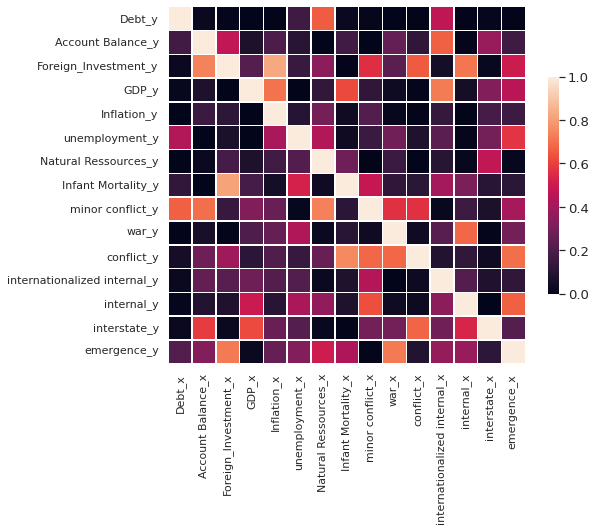

In [18]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#0et up the matplotlib figure
size = max(8, len(corr.columns)/2.)
f, ax = plt.subplots(figsize=(size, size))
sns.set(font_scale=1.2)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, ax=ax)
plt.savefig("Granger_causality.png")

Grouping the entire dataset by Year and taking the average of each of the features.

In [19]:
data = gdf.groupby("Year").mean()[['Language','Account Balance','Corruption','Foreign_Investment','GDP','Inflation','Ethnicity','Religion','unemployment','Natural Ressources','Infant Mortality','conflict']]
dates = data.index.astype(int).astype(str)

dates = dates_from_str(dates)
data.index = pd.DatetimeIndex(dates)
data = data.fillna(data.mean())
data

,Language,Account Balance,Corruption,Foreign_Investment,GDP,Inflation,Ethnicity,Religion,unemployment,Natural Ressources,Infant Mortality,conflict
1960-12-31,0.372697,-1.288368,42.949721,4.186392,2.135012,3.965499,0.398394,0.433683,7.170675,7.228914,100.857732,0.068493
1961-12-31,0.374416,-0.303796,42.906593,4.186392,1.473313,3.356018,0.399695,0.433689,4.050000,7.228914,99.402000,0.099099
1962-12-31,0.376914,-0.160575,42.812155,4.186392,2.959768,4.450849,0.400638,0.434410,3.400000,7.228914,100.782353,0.099548
1963-12-31,0.373697,-0.507131,42.834254,4.186392,2.963117,5.565766,0.399118,0.434962,3.500000,7.228914,98.775676,0.099548
1964-12-31,0.377889,-1.401022,42.706522,4.186392,3.245647,6.198837,0.400453,0.434019,3.150000,7.228914,99.038462,0.125000
1965-12-31,0.375171,-2.637475,42.722826,4.186392,3.113380,12.672091,0.398338,0.431752,2.850000,7.228914,96.065289,0.133929
1966-12-31,0.373409,-1.519797,42.748634,4.186392,1.981260,19.495705,0.396828,0.432639,2.550000,7.228914,94.920492,0.134529
1967-12-31,0.376715,-0.715966,43.010753,4.186392,1.963450,5.630134,0.395370,0.429998,2.550000,7.228914,92.942063,0.168142
1968-12-31,0.374051,-1.849073,42.883978,4.186392,4.152771,6.436562,0.397759,0.433532,2.400000,7.228914,89.513636,0.122172
1969-12-31,0.372425,-2.853777,42.896175,4.186392,4.045116,3.969272,0.396817,0.433601,5.304667,7.228914,87.953571,0.152466


Writing a function to calculate the Adfuller test

In [20]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[5]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

Writing a function to reverse the 2nd diff calculation.

In [21]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_2d'].cumsum()
    return df_fc

Creating a dataframe with data only from USA

In [22]:
temp = gdf.copy()
temp

usa = temp.query("Country in ('United States')")
usa

,Country,Year,Language,Country Code,Debt,Account Balance,Corruption,GeoPoint,Foreign_Investment,GDP,...,intensity_level,minor conflict,war,conflict,internationalized internal,internal,interstate,extrasymetric,emergence,War emergence
5620,United States,1960,0.5647,USA,54.29,NaN,71.0,POINT (-100.44588 39.78373),NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5621,United States,1961,0.5647,USA,52.95,0.679817,71.0,POINT (-100.44588 39.78373),NaN,0.618121,...,0,0,0,0,0,0,0,0,0,0
5622,United States,1962,0.5647,USA,50.84,0.560338,71.0,POINT (-100.44588 39.78373),NaN,4.480669,...,0,0,0,0,0,0,0,0,0,0
5623,United States,1963,0.5647,USA,49.44,0.692288,71.0,POINT (-100.44588 39.78373),NaN,2.908272,...,0,0,0,0,0,0,0,0,0,0
5624,United States,1964,0.5647,USA,46.92,0.996988,71.0,POINT (-100.44588 39.78373),NaN,4.340549,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,United States,2014,0.5647,USA,104.61,-2.084227,71.0,POINT (-100.44588 39.78373),1.437391,1.702634,...,0,1,0,1,1,0,0,0,0,0
5677,United States,2015,0.5647,USA,105.15,-2.238116,71.0,POINT (-100.44588 39.78373),2.794219,2.125123,...,0,1,0,1,1,0,0,0,0,0
5678,United States,2016,0.5647,USA,105.15,-2.289762,71.0,POINT (-100.44588 39.78373),2.643043,0.835128,...,0,1,0,1,1,0,0,0,0,0
5679,United States,2017,0.5647,USA,105.15,-2.256264,71.0,POINT (-100.44588 39.78373),1.820076,1.564444,...,0,1,0,1,1,0,0,0,0,0


Grouping the USA data by year and adding a datetime index

In [23]:
usa_data = usa.groupby("Year").mean()[['Language','Account Balance','Corruption','Foreign_Investment','GDP','Inflation','Ethnicity','Religion','unemployment','Natural Ressources','Infant Mortality','conflict']]
dates_usa = usa_data.index.astype(int).astype(str)

dates_usa = dates_from_str(dates_usa)
usa_data.index = pd.DatetimeIndex(dates_usa)
usa_data = data.fillna(data.mean())
usa_data

,Language,Account Balance,Corruption,Foreign_Investment,GDP,Inflation,Ethnicity,Religion,unemployment,Natural Ressources,Infant Mortality,conflict
1960-12-31,0.372697,-1.288368,42.949721,4.186392,2.135012,3.965499,0.398394,0.433683,7.170675,7.228914,100.857732,0.068493
1961-12-31,0.374416,-0.303796,42.906593,4.186392,1.473313,3.356018,0.399695,0.433689,4.050000,7.228914,99.402000,0.099099
1962-12-31,0.376914,-0.160575,42.812155,4.186392,2.959768,4.450849,0.400638,0.434410,3.400000,7.228914,100.782353,0.099548
1963-12-31,0.373697,-0.507131,42.834254,4.186392,2.963117,5.565766,0.399118,0.434962,3.500000,7.228914,98.775676,0.099548
1964-12-31,0.377889,-1.401022,42.706522,4.186392,3.245647,6.198837,0.400453,0.434019,3.150000,7.228914,99.038462,0.125000
1965-12-31,0.375171,-2.637475,42.722826,4.186392,3.113380,12.672091,0.398338,0.431752,2.850000,7.228914,96.065289,0.133929
1966-12-31,0.373409,-1.519797,42.748634,4.186392,1.981260,19.495705,0.396828,0.432639,2.550000,7.228914,94.920492,0.134529
1967-12-31,0.376715,-0.715966,43.010753,4.186392,1.963450,5.630134,0.395370,0.429998,2.550000,7.228914,92.942063,0.168142
1968-12-31,0.374051,-1.849073,42.883978,4.186392,4.152771,6.436562,0.397759,0.433532,2.400000,7.228914,89.513636,0.122172
1969-12-31,0.372425,-2.853777,42.896175,4.186392,4.045116,3.969272,0.396817,0.433601,5.304667,7.228914,87.953571,0.152466


Dividing data into Train adn Test

In [24]:
nobs = 4
df_train_usa, df_test_usa = usa_data[0:-nobs], usa_data[-nobs:]

# Check size
print(df_train_usa.shape)
print(df_test_usa.shape)

(55, 12)
(4, 12)


Differencing the series to make it sationary

In [25]:
df_differenced_usa = df_train_usa.diff().dropna()
df_differenced_usa = df_differenced_usa.diff().dropna()
df_differenced_usa

,Language,Account Balance,Corruption,Foreign_Investment,GDP,Inflation,Ethnicity,Religion,unemployment,Natural Ressources,Infant Mortality,conflict
1962-12-31,0.000778,-0.841350,-0.051311,0.000000,2.148154,1.704312,-0.000358,0.000715,2.470675e+00,0.000000,2.836085,-0.030158
1963-12-31,-0.005715,-0.489777,0.116538,0.000000,-1.483107,0.020087,-0.002464,-0.000169,7.499998e-01,0.000000,-3.387030,-0.000448
1964-12-31,0.007409,-0.547335,-0.149832,0.000000,0.279182,-0.481846,0.002855,-0.001495,-4.499999e-01,0.000000,2.269463,0.025452
1965-12-31,-0.006910,-0.342562,0.144037,0.000000,-0.414797,5.840183,-0.003449,-0.001324,5.000007e-02,0.000000,-3.235958,-0.016524
1966-12-31,0.000957,2.354132,0.009503,0.000000,-0.999853,0.350360,0.000604,0.003154,-1.788139e-07,0.000000,1.828375,-0.008328
1967-12-31,0.005068,-0.313847,0.236311,0.000000,1.114309,-20.689185,0.000052,-0.003528,3.000001e-01,0.000000,-0.833631,0.033012
1968-12-31,-0.005970,-1.936939,-0.388894,0.000000,2.207132,14.671999,0.003846,0.006175,-1.500000e-01,0.000000,-1.449999,-0.079582
1969-12-31,0.001038,0.128403,0.138972,0.000000,-2.296977,-3.273717,-0.003331,-0.003464,3.054667e+00,0.000000,1.868362,0.076264
1970-12-31,0.004187,1.166342,0.047672,-1.727868,0.662692,3.195106,0.000831,-0.000621,-2.900783e+00,-2.265100,-0.997028,-0.056635
1971-12-31,0.001072,1.847145,-0.294602,1.059934,-2.226241,0.201205,0.002785,0.001288,-5.266477e-02,1.951778,0.588130,0.039228


In [26]:
for name, column in df_differenced_usa.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Language" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.7699
 No. Lags Chosen       = 5
 Critical value 1%     = -3.578
 Critical value 5%     = -2.925
 Critical value 10%    = -2.601
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Account Balance" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.6228
 No. Lags Chosen       = 11
 Critical value 1%     = -3.601
 Critical value 5%     = -2.935
 Critical value 10%    = -2.606
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Corruption" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sign

Comparing some scores to choose the best lag

In [27]:
model_usa = VAR(df_differenced_usa)
for i in [1,2,3]:
    result = model_usa.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -34.59764255382359
BIC :  -28.743911398079305
FPE :  1.073625593902386e-15
HQIC:  -32.35346018492186 

Lag Order = 2
AIC :  -39.21376944289952
BIC :  -27.85008925040349
FPE :  2.821060513368929e-17
HQIC:  -34.87137114165394 

Lag Order = 3
AIC :  -55.63605778452688
BIC :  -38.657293496324954
FPE :  1.074998639135845e-22
HQIC:  -49.1704475044281 



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency A-DEC will be used.



Fitting model to lag order 3

In [28]:
model_fitted_usa = model_usa.fit(3)
model_fitted_usa.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 06, Dec, 2022
Time:                     23:12:29
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -38.6573
Nobs:                     50.0000    HQIC:                  -49.1704
Log likelihood:           983.538    FPE:                1.07500e-22
AIC:                     -55.6361    Det(Omega_mle):     1.39578e-25
--------------------------------------------------------------------
Results for equation Language
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                        -0.000060         0.000450           -0.134           0.894
L1.Language                  -1.267347         0.481864           -2.630           0.009
L1.Account Balance       

In [29]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted_usa.resid)

for col, val in zip(df_differenced_usa.columns, out):
    print((col), ':', round(val, 2))

Language : 1.33
Account Balance : 1.72
Corruption : 1.4
Foreign_Investment : 1.8
GDP : 2.48
Inflation : 1.88
Ethnicity : 1.59
Religion : 1.91
unemployment : 1.56
Natural Ressources : 1.84
Infant Mortality : 1.35
conflict : 1.22


Input for forecasting

In [30]:
lag_order = model_fitted_usa.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input_usa = df_test_usa.diff().dropna().values[-lag_order:]
forecast_input_usa

3


array([[ 2.76028504e-03,  2.36177040e-01,  4.90781410e-01,
        -2.23359014e+00,  1.51268178e-01,  8.80865806e-01,
        -7.31649191e-04,  7.48537694e-03, -2.13365245e-01,
        -5.42256620e-01, -9.78764514e-01,  1.23503740e-02],
       [-1.27359781e-03,  6.33444741e-01, -1.81293734e-01,
        -3.41389062e-01,  2.81081066e-01,  3.74457099e-01,
         5.78419720e-04, -4.13208796e-03, -2.24192417e-01,
         1.06674759e+00, -4.46653018e-01, -1.80844430e-02],
       [ 7.43624295e-04,  1.20203502e-01, -7.68702088e-02,
        -8.60531525e-01, -2.88373757e-01,  1.22384888e-01,
         5.77752319e-04, -1.99607019e-03, -7.47203334e-02,
         1.18126163e-02, -7.22399180e-01,  1.18567012e-02]])

Creating a dataframe with forecast data in it

In [31]:
fc_usa = model_fitted_usa.forecast(y=forecast_input_usa, steps=nobs)
df_forecast_usa = pd.DataFrame(fc_usa, index=usa_data.index[-nobs:], columns=usa_data.columns + '_2d')
df_forecast_usa

,Language_2d,Account Balance_2d,Corruption_2d,Foreign_Investment_2d,GDP_2d,Inflation_2d,Ethnicity_2d,Religion_2d,unemployment_2d,Natural Ressources_2d,Infant Mortality_2d,conflict_2d
2015-12-31,0.001799,1.222348,-0.293193,4.071356,-2.759755,-55.078650,0.003861,-0.000827,1.128338,-1.116602,2.371561,0.033296
2016-12-31,-0.003503,-0.587797,0.626589,-1.103153,4.157263,6.652452,-0.004450,0.001750,-1.343273,-0.266593,-2.981724,-0.055346
2017-12-31,-0.002798,1.847005,-0.389969,-0.079444,-1.919749,114.061939,-0.001128,0.002176,0.749477,3.855916,0.151507,0.015404
2018-12-31,0.004258,0.047487,0.107379,-0.142630,-1.434645,4.379816,-0.000647,-0.003972,0.081218,-2.906251,1.687494,0.017467


Reversing the differencing we did earlier

In [32]:
df_results_usa = invert_transformation(df_train_usa, df_forecast_usa, second_diff=True)   
df_results_usa

,Language_2d,Account Balance_2d,Corruption_2d,Foreign_Investment_2d,GDP_2d,Inflation_2d,Ethnicity_2d,Religion_2d,unemployment_2d,Natural Ressources_2d,...,Religion_1d,Religion_forecast,unemployment_1d,unemployment_forecast,Natural Ressources_1d,Natural Ressources_forecast,Infant Mortality_1d,Infant Mortality_forecast,conflict_1d,conflict_forecast
2015-12-31,0.001799,1.222348,-0.293193,4.071356,-2.759755,-55.078650,0.003861,-0.000827,1.128338,-1.116602,...,-0.000453,0.431193,0.936817,8.908831,-2.012138,6.548617,1.754801,27.363756,0.056613,0.215905
2016-12-31,-0.003503,-0.587797,0.626589,-1.103153,4.157263,6.652452,-0.004450,0.001750,-1.343273,-0.266593,...,0.001297,0.432943,-0.406456,7.565558,-2.278731,6.282024,-1.226923,24.382032,0.001266,0.160559
2017-12-31,-0.002798,1.847005,-0.389969,-0.079444,-1.919749,114.061939,-0.001128,0.002176,0.749477,3.855916,...,0.003473,0.435119,0.343022,8.315035,1.577185,10.137940,-1.075416,24.533539,0.016670,0.175962
2018-12-31,0.004258,0.047487,0.107379,-0.142630,-1.434645,4.379816,-0.000647,-0.003972,0.081218,-2.906251,...,-0.000499,0.431147,0.424239,8.396253,-1.329066,7.231689,0.612078,26.221033,0.034137,0.193429


Plotting Ground Truth vs Predicted

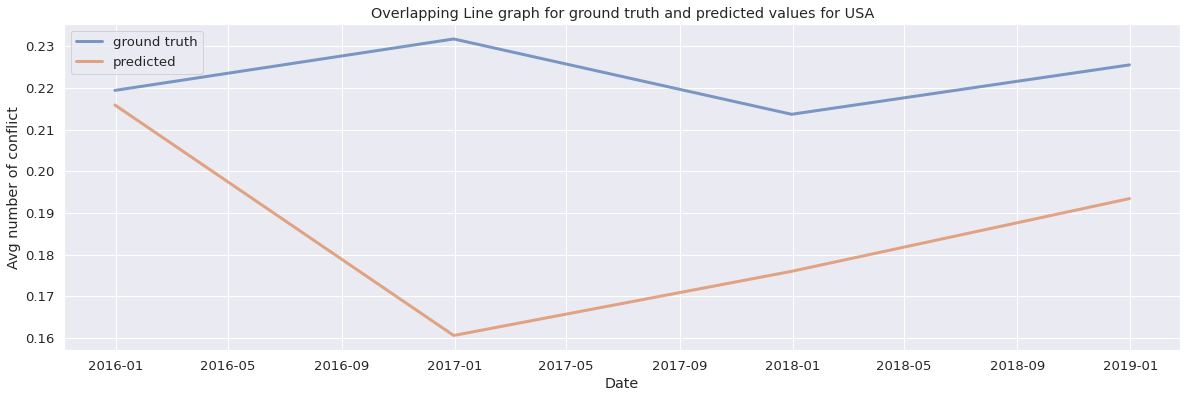

In [33]:
plt.figure(figsize=(20, 6))
plt.plot(df_test_usa['conflict'], linewidth=3, alpha = 0.7, label='ground truth')
plt.plot(df_results_usa['conflict_forecast'], linewidth=3, alpha = 0.7, label='predicted')
plt.legend(loc='best')
plt.title("Overlapping Line graph for ground truth and predicted values for USA")
plt.xlabel('Date')
plt.ylabel('Avg number of conflict')
plt.savefig("usa_forecast.png")

Calculating different metrics to evaluate model

In [34]:
usa_test_mse = metrics.mean_squared_error(df_test_usa['conflict'], df_results_usa['conflict_forecast'])
usa_test_mae = metrics.mean_absolute_error(df_test_usa['conflict'], df_results_usa['conflict_forecast'])
usa_test_median = metrics.median_absolute_error(df_test_usa['conflict'], df_results_usa['conflict_forecast'])
print("VAR test mse = ",usa_test_mse," & mae = ",usa_test_mae," & rmse = ", sqrt(usa_test_mse), " & median abs error = ", usa_test_median)

VAR test mse =  0.0018836916352353047  & mae =  0.03613044894883472  & rmse =  0.043401516508473584  & median abs error =  0.03490805959209825


Differencing just Conflict and calculating autocorrelation

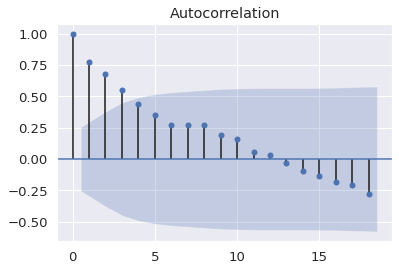

In [35]:
series = data['conflict']
# series_differenced = series.diff().dropna()
# series_differenced = series_differenced.diff().dropna()
plot_acf(series)
plt.show()

Fitting just conflict data to ARIMA model and evaluating whether is fitting properly

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency A-DEC will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency A-DEC will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency A-DEC will be used.



                               SARIMAX Results                                
Dep. Variable:               conflict   No. Observations:                   59
Model:                 ARIMA(3, 2, 0)   Log Likelihood                 140.317
Date:                Tue, 06 Dec 2022   AIC                           -272.635
Time:                        23:12:33   BIC                           -264.462
Sample:                    12-31-1960   HQIC                          -269.459
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0217      0.132     -7.759      0.000      -1.280      -0.764
ar.L2         -0.7490      0.169     -4.419      0.000      -1.081      -0.417
ar.L3         -0.3977      0.168     -2.374      0.0

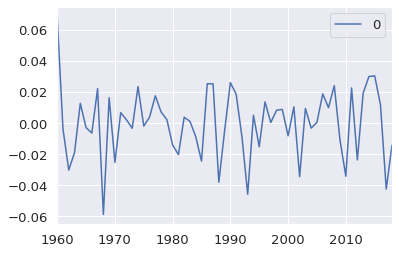

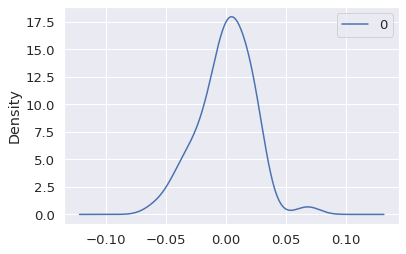

               0
count  59.000000
mean    0.000134
std     0.022382
min    -0.058663
25%    -0.012557
50%     0.002216
75%     0.015059
max     0.068493


In [36]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(series, order=(3,2,0))
model_arima_fit = model_arima.fit()
# summary of fit model
print(model_arima_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_arima_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

Fitting the model and using it predict values.

In [37]:
from sklearn.model_selection import train_test_split
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(3,2,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('Predicted=%f, Expected=%f' % (yhat, obs))

Predicted=0.181484, Expected=0.187500
Predicted=0.173423, Expected=0.185022
Predicted=0.185240, Expected=0.176991
Predicted=0.174917, Expected=0.185841
Predicted=0.186614, Expected=0.151786
Predicted=0.153180, Expected=0.160714
Predicted=0.150370, Expected=0.147982
Predicted=0.143139, Expected=0.142857
Predicted=0.127297, Expected=0.147982
Predicted=0.145068, Expected=0.155556
Predicted=0.148419, Expected=0.174107
Predicted=0.174396, Expected=0.164444
Predicted=0.175801, Expected=0.140271
Predicted=0.149445, Expected=0.170404
Predicted=0.166426, Expected=0.143498
Predicted=0.141038, Expected=0.159292
Predicted=0.150861, Expected=0.182609
Predicted=0.184653, Expected=0.219409
Predicted=0.216808, Expected=0.231760
Predicted=0.256759, Expected=0.213675
Predicted=0.240948, Expected=0.225532


Plotting the Ground Truth vs Predicted values graph along with calculating some metrics to evaluate predictions

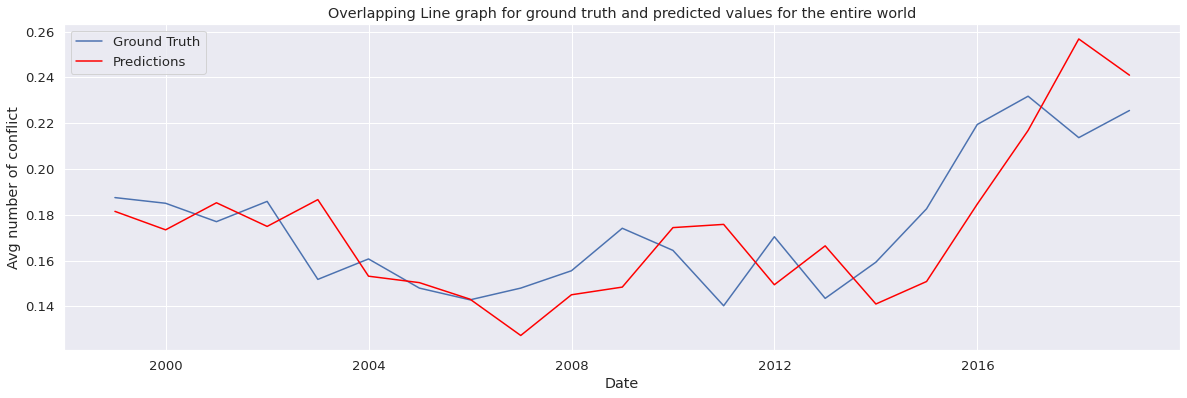

ARIMA test mse =  0.00047734362989469464  & mae =  0.018393236137489766  & rmse =  0.021848195117553638  & median abs error =  0.01541627260037215


<Figure size 432x288 with 0 Axes>

In [38]:
# plot forecasts against actual outcomes
test2 = series[size:len(X)]
test2 = pd.DataFrame(test2)
test2['Test'] = test
test2['Predictions'] = predictions

plt.figure(figsize=(20, 6))
plt.title("Overlapping Line graph for ground truth and predicted values for the entire world")
plt.xlabel('Date')
plt.ylabel('Avg number of conflict')
plt.plot(test2['Test'], label = 'Ground Truth')
plt.plot(test2['Predictions'], color = 'red', label = 'Predictions')
plt.legend(loc='best')
plt.show()
plt.savefig("arima_world_forecast.png")

world_test_mse = metrics.mean_squared_error(test, predictions)
world_test_mae = metrics.mean_absolute_error(test, predictions)
world_test_median = metrics.median_absolute_error(test, predictions)
print("ARIMA test mse = ",world_test_mse," & mae = ",world_test_mae," & rmse = ", sqrt(world_test_mse), " & median abs error = ", world_test_median)